In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [275]:
df = pd.read_csv('real_data.csv', sep=';')
# при сохранении дс почему-то возникают пустые строки и столбцы
df.dropna(how="all", axis=0, inplace=True)  # удаляем пустые строки
df.dropna(how="all", axis=1, inplace=True)  # удаляем пустые столбцы
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 80
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        81 non-null     object 
 1   birth_date                 81 non-null     object 
 2   analysis_date              81 non-null     object 
 3   age                        81 non-null     float64
 4   hemoglobin                 81 non-null     float64
 5   erythrocytes               81 non-null     float64
 6   mean_erythrocyte_volume    81 non-null     float64
 7   mean_hb_content            81 non-null     float64
 8   mean_hb_concentration      81 non-null     float64
 9   erythrocyte_heterogeneity  81 non-null     float64
 10  hematocrit                 81 non-null     float64
 11  platelets                  81 non-null     float64
 12  mean_platelet_volume       81 non-null     float64
 13  platelet_heterogeneity     81 non-null     float64
 14  t

sex - sex  
birth_date - birth_date  
analysis_date - analysis_date  
age - age  
hemoglobin - hemoglobin  
Эритроциты - erythrocytes  
Средний объём эритроцитов - mean_erythrocyte_volume  
Среднее содержание Hb в эритроците - mean_hb_content  
Средняя концентрация Hb в эритроците - mean_hb_concentration  
Гетерогенность эритроцитов по объему - erythrocyte_heterogeneity  
Гематокрит - hematocrit  
Тромбоциты - platelets  
Средний объём тромбоцитов - mean_platelet_volume  
Гетерогенность тромбоцитов по объёму - platelet_heterogeneity  
Тромбокрит - thrombocrit  
Лейкоциты - leukocytes  
Нейтрофилы% - neutrophils_percent  
Эозинофилы% - eosinophils_percent  
Базофилы% - basophils_percent  
Моноциты% - monocytes_percent  
Лимфоциты% - lymphocytes_percent  
Нейтрофилы - neutrophils  
Эозинофилы - eosinophils  
Базофилы - basophils  
Моноциты - monocytes  
Лимфоциты - lymphocytes  
СОЭ - esr

In [276]:
df.head()

,sex,birth_date,analysis_date,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,...,eosinophils_percent,basophils_percent,monocytes_percent,lymphocytes_percent,neutrophils,eosinophils,basophils,monocytes,lymphocytes,esr
0,m,24.12.2003,12.02.2025,22.0,165.0,5.62,88.4,29.3,331.0,13.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,m,30.04.1980,12.02.2025,45.0,160.0,5.30,91.4,30.1,330.0,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f,20.03.1980,13.02.2025,45.0,120.0,4.16,88.2,28.9,327.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f,18.08.2003,11.02.2025,22.0,132.0,4.32,90.6,30.6,337.0,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,m,13.05.1979,12.02.2025,46.0,160.0,5.43,88.5,29.5,333.0,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df['sex'] = df['sex'].replace({'f': 0, 'm': 1})
df = df.drop_duplicates()
df.shape[0]

C:\Users\bents\AppData\Local\Temp\ipykernel_27712\4153988334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'f': 0, 'm': 1})


73

предобработка:

In [278]:
def dcast(df):
    fcols = df.select_dtypes('float').columns
    icols = df.select_dtypes('int').columns

    df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
    df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

    return df

In [279]:
df = df.drop(columns=['birth_date', 'analysis_date'], errors='ignore')

df = dcast(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 80
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        73 non-null     int8   
 1   age                        73 non-null     float32
 2   hemoglobin                 73 non-null     float32
 3   erythrocytes               73 non-null     float32
 4   mean_erythrocyte_volume    73 non-null     float32
 5   mean_hb_content            73 non-null     float32
 6   mean_hb_concentration      73 non-null     float32
 7   erythrocyte_heterogeneity  73 non-null     float32
 8   hematocrit                 73 non-null     float32
 9   platelets                  73 non-null     float32
 10  mean_platelet_volume       73 non-null     float32
 11  platelet_heterogeneity     73 non-null     float32
 12  thrombocrit                73 non-null     float32
 13  leukocytes                 73 non-null     float32
 14  n

<Axes: >

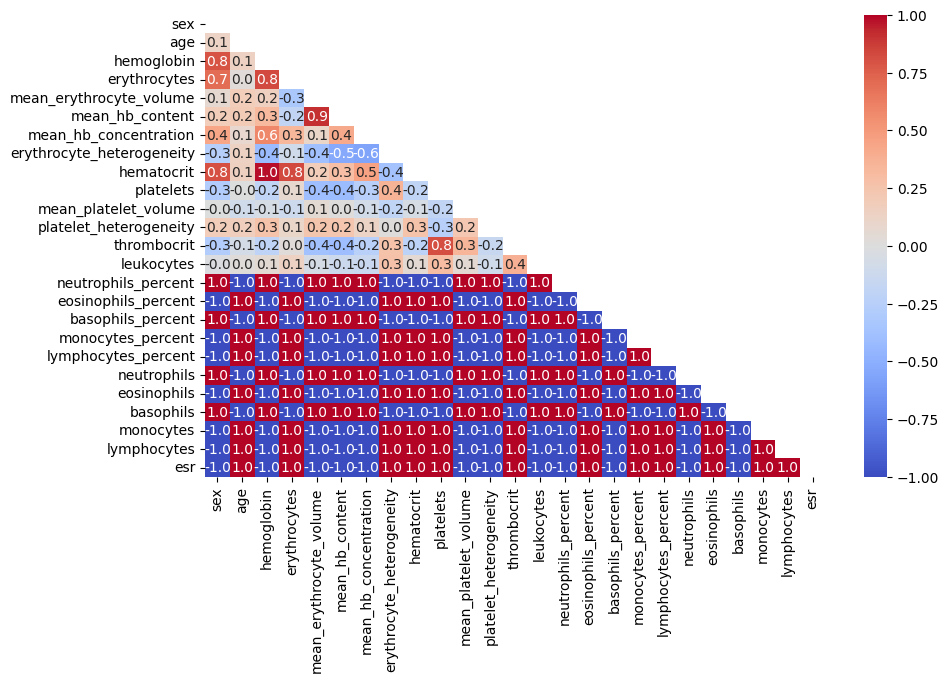

In [280]:
matrix = np.triu(df.corr(method='spearman'))

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.1f', cmap='coolwarm', mask=matrix)

на _percent и след столбцы можно не смотреть - там всего 2 непустых значения

## Кластеризация

### 1. PCA

![alt text](image.png)

обрежем df, убрав лейкоцитарную формулу (там где пропуски)

In [281]:
df_cut = df.drop(df.columns[-11:], axis=1)
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 80
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        73 non-null     int8   
 1   age                        73 non-null     float32
 2   hemoglobin                 73 non-null     float32
 3   erythrocytes               73 non-null     float32
 4   mean_erythrocyte_volume    73 non-null     float32
 5   mean_hb_content            73 non-null     float32
 6   mean_hb_concentration      73 non-null     float32
 7   erythrocyte_heterogeneity  73 non-null     float32
 8   hematocrit                 73 non-null     float32
 9   platelets                  73 non-null     float32
 10  mean_platelet_volume       73 non-null     float32
 11  platelet_heterogeneity     73 non-null     float32
 12  thrombocrit                73 non-null     float32
 13  leukocytes                 73 non-null     float32
dtypes

снижаем размерность - то есть уменьшаем количество параметров, по которым будем делать кластеризацию. смотрим, какую долю данных описывает разное количество параметров

Text(0, 0.5, 'cumulative explained variance')

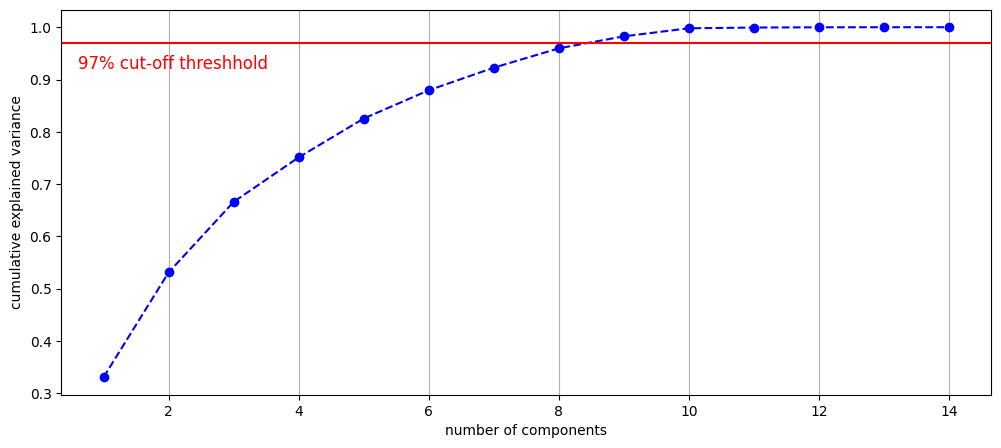

In [282]:
_df = df_cut.copy()

df_labels = pd.get_dummies(_df)

X_scaled = StandardScaler().fit_transform(df_labels)

pca = PCA().fit(X_scaled)

plt.figure(figsize=(12,5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1,1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--',color='b')
plt.axhline(y=0.97, color='r',linestyle='-')
plt.text(0.6, 0.92, '97% cut-off threshhold', color='red', fontsize='12')
plt.grid(axis='x')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [283]:
n_components_97 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
n_components_100 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.995) + 1

# получаем важность признаков в первых n_components_97 и n_components_100 компонентах
feature_names = df_labels.columns

top_8_components = pd.DataFrame(pca.components_[:n_components_97], columns=feature_names)
top_10_components = pd.DataFrame(pca.components_[:n_components_100], columns=feature_names)

# Получаем топ-8 признаков по сумме абсолютных вкладов в первые 8 компонент
top_8_features = (top_8_components.abs().sum(axis=0)
                  .sort_values(ascending=False)
                  .head(8))

# Получаем топ-10 признаков по сумме абсолютных вкладов в первые 10 компонент
top_10_features = (top_10_components.abs().sum(axis=0)
                   .sort_values(ascending=False)
                   .head(10))

top_8_features.index.tolist()

['age',
 'mean_hb_concentration',
 'mean_platelet_volume',
 'leukocytes',
 'platelet_heterogeneity',
 'platelets',
 'thrombocrit',
 'mean_erythrocyte_volume']

In [284]:
top_10_features.index.tolist()

['age',
 'sex',
 'erythrocyte_heterogeneity',
 'platelet_heterogeneity',
 'mean_hb_concentration',
 'mean_platelet_volume',
 'leukocytes',
 'platelets',
 'mean_erythrocyte_volume',
 'thrombocrit']

sex - sex  
birth_date - birth_date  
analysis_date - analysis_date  
age - age  
hemoglobin - hemoglobin  
Эритроциты - erythrocytes  
Средний объём эритроцитов - mean_erythrocyte_volume  
Среднее содержание Hb в эритроците - mean_hb_content  
Средняя концентрация Hb в эритроците - mean_hb_concentration  
Гетерогенность эритроцитов по объему - erythrocyte_heterogeneity  
Гематокрит - hematocrit  
Тромбоциты - platelets  
Средний объём тромбоцитов - mean_platelet_volume  
Гетерогенность тромбоцитов по объёму - platelet_heterogeneity  
Тромбокрит - thrombocrit  
Лейкоциты - leukocytes  
Нейтрофилы% - neutrophils_percent  
Эозинофилы% - eosinophils_percent  
Базофилы% - basophils_percent  
Моноциты% - monocytes_percent  
Лимфоциты% - lymphocytes_percent  
Нейтрофилы - neutrophils  
Эозинофилы - eosinophils  
Базофилы - basophils  
Моноциты - monocytes  
Лимфоциты - lymphocytes  
СОЭ - esr

8 компонент описывают почти 97% разброса (дисперсии) данных, 10 - 100%. можно вообще не сокращать количество параметров

Эльбоу-кривая: график зависимости суммы квадратов ошибок (SSE) от количества кластеров и выбрать точку, где наблюдается "излом" кривой.


Силуэтный коэффициент: показывает, насколько хорошо каждый объект вписывается в свой кластер. Коэффициент близкий к 1 указывает на хорошие кластеры.

In [285]:
distortions = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


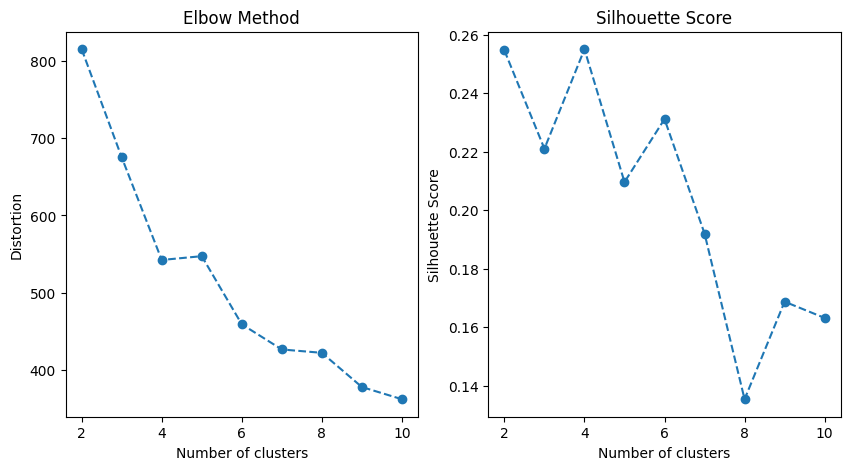

In [286]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, distortions, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

наилучшим выбором является 2 либо 4 кластера

- лучше 4: здоров, есть воспаление, есть анемия, есть и то и то

### K-means

In [287]:
df_clust = df_cut.copy()

kmeans = KMeans(n_clusters=4, random_state=42,init='k-means++')
df_clust['k-cluster'] = kmeans.fit_predict(X_scaled)

кластеризация происходит по комбинированным параметрам, которые ты получил после применения PCA (анализ главных компонент). PCA снижает размерность данных и создает новые компоненты, которые являются линейными комбинациями исходных признаков. эти новые компоненты представляют собой абстракцию, где каждый из них может быть смесью нескольких исходных параметров.

Чтобы учитывать, что 6 компонентов объясняют 90% вариативности данных, надо использовать больше компонентов, чем только первые 2, при создании визуализации. В PCA, при сохранении 90% вариативности, мы можем взять первые 6 компонентов и затем визуализировать их с использованием техники t-SNE или PCA с сохранением большего числа компонентов для лучшей визуализации.

t-SNE — это метод, который помогает эффективно визуализировать многомерные данные в 2D или 3D, сохраняет локальные структуры и группы, что особенно полезно при работе с большими наборами данных.

In [288]:
pca_6d = PCA(n_components=10).fit_transform(X_scaled)
tsne = TSNE(n_components=2, random_state=42)
pca_2d_tsne = tsne.fit_transform(pca_6d)

clusters = np.unique(df_clust['k-cluster'])

cmap = plt.get_cmap('viridis', len(clusters))

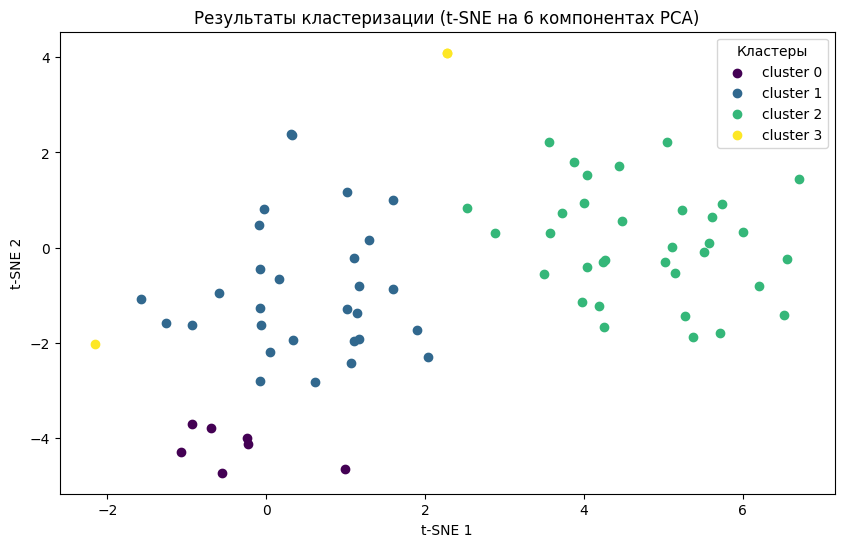

In [289]:
plt.figure(figsize=(10, 6))

for cluster in clusters:
    indices = df_clust['k-cluster'] == cluster
    plt.scatter(pca_2d_tsne[indices, 0], pca_2d_tsne[indices, 1],
                color=cmap(cluster), label=f'cluster {cluster}')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Результаты кластеризации (t-SNE на 6 компонентах PCA)')
plt.legend(title='Кластеры')
plt.show()

- Ось X — это первый компонент, полученный после применения t-SNE. Он отображает одно из новых измерений, созданных после применения t-SNE для проекции данных в 2D.
- Ось Y — это второй компонент, аналогично отображающий другое новое измерение, полученное t-SNE.

t-SNE работает так, чтобы сохранить локальную структуру данных и группировки, которые существовали в более высокоразмерных данных, в 2D-пространстве. То есть:

Каждая точка на графике — это результат преобразования одного объекта из исходных данных в новое 2D-пространство, где сохраняется информация о сходстве объектов.
Точки, которые оказались рядом друг с другом на графике, в исходном пространстве были также схожи (в соответствии с метрикой t-SNE), и наоборот.

средние значения параметров для различных кластеров:

In [290]:
df_clust.groupby('k-cluster').mean()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
k-cluster,,,,,,,,,,,,,,
0,0.142857,21.285715,116.571426,4.711429,76.828568,24.757143,322.428558,15.914286,36.099998,329.571442,9.142858,16.342855,0.298571,6.418571
1,0.137931,36.758621,132.862076,4.406207,90.824135,30.168966,332.241394,13.479310,39.968964,270.241394,9.300000,16.786207,0.251379,5.950345
2,0.970588,28.323530,154.470581,5.192647,88.155884,29.750000,338.970581,12.982353,45.752941,249.705887,9.432353,16.829412,0.232941,6.049706
3,0.666667,38.333332,151.000000,5.303333,86.033333,28.433334,330.000000,14.400001,45.733334,580.333313,10.033334,17.166666,0.563333,10.860001


гпт разметил кластеры так:

- 0 -> анемия
- 1 -> восп и анемия
- 2 -> здоров
- 3 -> воспаление

медианные (наиболее часто встречающиеся) значения параметров для различных кластеров:

In [291]:
df_clust.groupby('k-cluster').median()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
k-cluster,,,,,,,,,,,,,,
0,0.0,20.0,113.0,4.60,78.000000,25.100000,323.0,15.6,34.200001,339.0,9.60,16.299999,0.290,5.740
1,0.0,34.0,133.0,4.40,90.599998,30.100000,333.0,13.3,40.099998,262.0,9.30,16.900000,0.240,5.950
2,1.0,25.0,154.5,5.19,88.099998,29.650002,336.5,12.9,45.500000,252.0,9.05,16.799999,0.235,5.905
3,1.0,46.0,160.0,5.43,88.500000,29.500000,333.0,14.8,48.099998,653.0,9.00,17.299999,0.580,10.240


### DBSCAN

In [292]:
df_db = df_cut.copy()

dbscan = DBSCAN(eps=1, min_samples=2) # при таких параметрах получается 3 кластера, в которых минимум 2 значения
# причем если брать больше, то будет шляпа какая-то. если меньше - будет 2 кластера
df_db['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, df_db['dbscan_cluster'])
print(f'Silhouette score: {silhouette_avg}')

Silhouette score: 0.21174344420433044


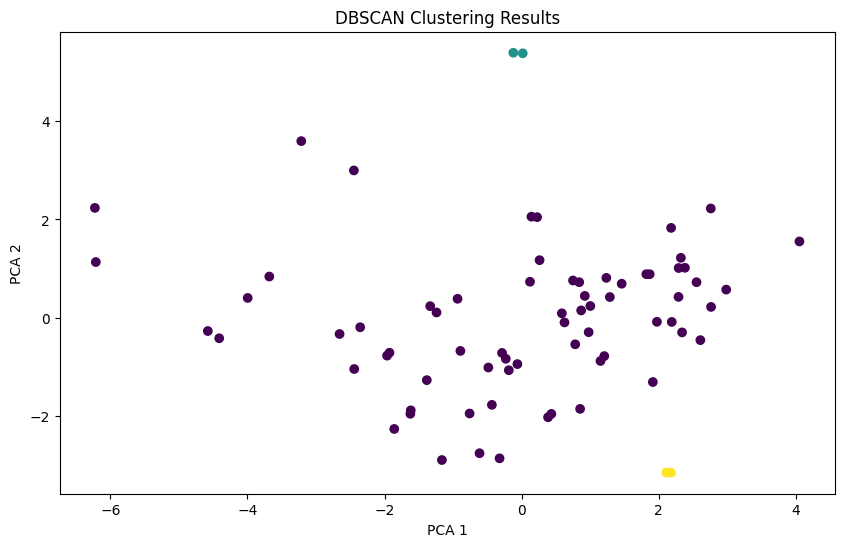

In [293]:
pca_2d = PCA(n_components=10).fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df_db['dbscan_cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results')
plt.show()

In [294]:
df_db.groupby('dbscan_cluster').mean()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
dbscan_cluster,,,,,,,,,,,,,,
-1,0.521739,30.014492,141.652176,4.84029,87.671013,29.263767,334.420288,13.497101,42.382607,271.057983,9.352174,16.74058,0.252899,6.17913
0,1.000000,46.000000,160.000000,5.43000,88.500000,29.500000,333.000000,14.800000,48.099998,653.000000,9.000000,17.50000,0.580000,10.24000
1,1.000000,65.000000,140.000000,4.19000,100.400002,33.400002,333.000000,13.000000,42.000000,183.000000,10.600000,17.40000,0.190000,4.46000


In [295]:
df_db.groupby('dbscan_cluster').median()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
dbscan_cluster,,,,,,,,,,,,,,
-1,1.0,25.0,144.0,4.86,88.300003,29.500000,334.0,13.2,42.900002,260.0,9.1,16.700001,0.24,6.09
0,1.0,46.0,160.0,5.43,88.500000,29.500000,333.0,14.8,48.099998,653.0,9.0,17.500000,0.58,10.24
1,1.0,65.0,140.0,4.19,100.400002,33.400002,333.0,13.0,42.000000,183.0,10.6,17.400000,0.19,4.46


### Иерархическая (agglomerative) кластеризация

Text(0.5, 1.0, 'Agglomerative Clustering Results with t-SNE')

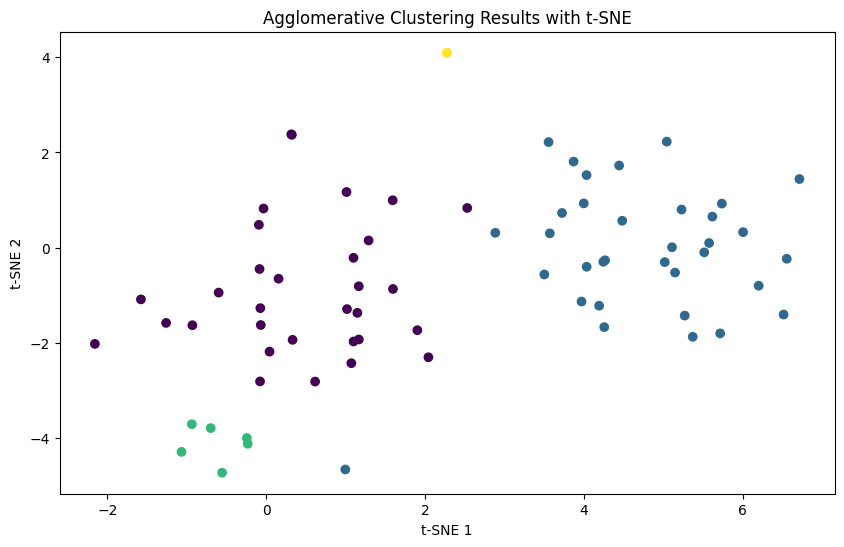

In [296]:
df_agg = df_cut.copy()

agg_clustering = AgglomerativeClustering(n_clusters=4)
df_agg['agg_cluster'] = agg_clustering.fit_predict(X_scaled)

pca_2d = PCA(n_components=10).fit_transform(X_scaled)
tsne_2d = TSNE(n_components=2, random_state=42).fit_transform(pca_2d)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], c=df_agg['agg_cluster'], cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Agglomerative Clustering Results with t-SNE')


In [297]:
df_agg.groupby('agg_cluster').mean()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
agg_cluster,,,,,,,,,,,,,,
0,0.161290,36.677418,133.548386,4.451291,90.470970,30.032259,331.967743,13.490323,40.206451,275.000000,9.325807,16.758064,0.258387,6.169677
1,0.970588,27.647058,153.970581,5.207647,87.697060,29.582352,338.794128,13.038235,45.626472,251.235291,9.508823,16.817646,0.236176,6.023823
2,0.000000,20.666666,113.166664,4.551667,77.299995,24.866667,321.833344,15.966667,35.116665,333.666656,9.016667,16.433332,0.298333,6.535000
3,1.000000,46.000000,160.000000,5.430000,88.500000,29.500000,333.000000,14.800000,48.099998,653.000000,9.000000,17.500000,0.580000,10.240000


In [298]:
df_agg.groupby('agg_cluster').median()

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
agg_cluster,,,,,,,,,,,,,,
0,0.0,34.0,133.0,4.41,90.599998,30.000000,332.0,13.6,40.200001,262.0,9.30,16.700001,0.24,6.15
1,1.0,25.0,154.5,5.21,87.800003,29.549999,336.5,12.9,45.150002,252.0,9.40,16.799999,0.24,5.72
2,0.0,20.0,110.5,4.51,79.150002,25.500000,322.5,16.0,34.150002,342.0,8.85,16.299999,0.29,6.52
3,1.0,46.0,160.0,5.43,88.500000,29.500000,333.0,14.8,48.099998,653.0,9.00,17.500000,0.58,10.24


In [299]:
silhouette_agg = silhouette_score(X_scaled, df_agg['agg_cluster'])
print(f'Silhouette score for Agglomerative Clustering: {silhouette_agg}')

Silhouette score for Agglomerative Clustering: 0.2418513149023056


- 1 означает, что объекты хорошо разделены на кластеры (очень плотные и хорошо отделяемые).
- 0 означает, что объекты находятся на границе между двумя кластерами.
- -1 означает, что объекты могли бы быть отнесены к другому кластеру.

## Итог - K-means победил

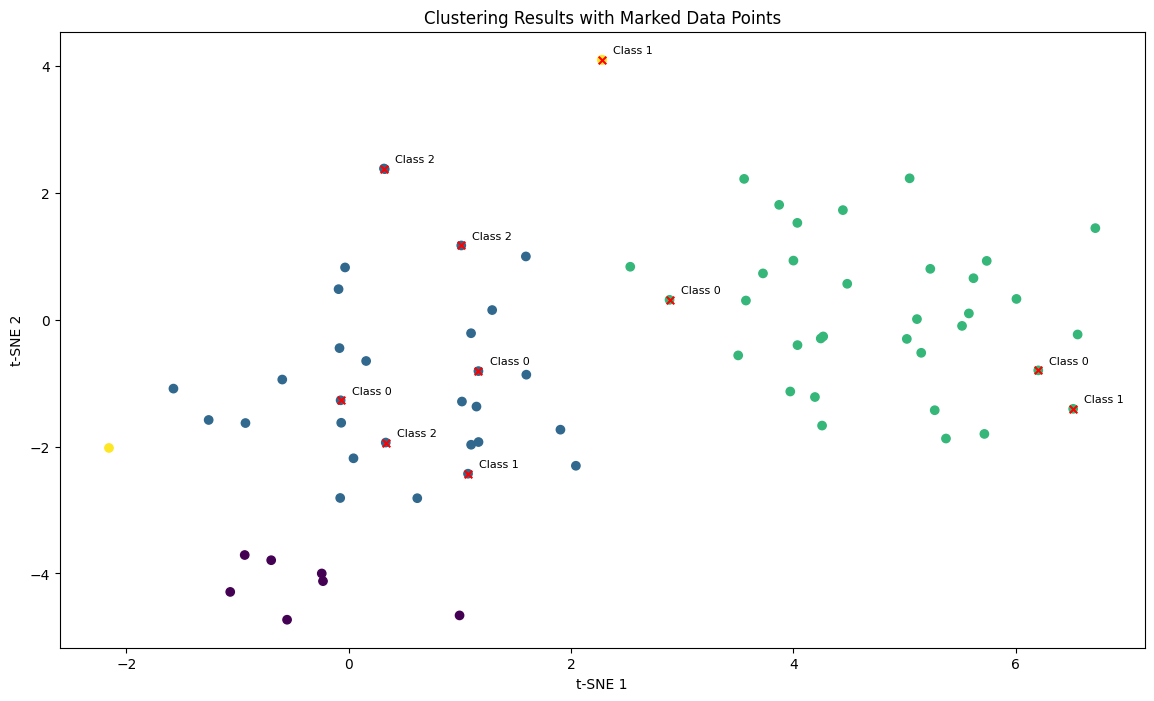

In [300]:
# искусственно разметим 10 записей
marked_data_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
marked_labels = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0]

plt.figure(figsize=(14, 8))
scatter = plt.scatter(pca_2d_tsne[:, 0], pca_2d_tsne[:, 1], c=df_clust['k-cluster'], cmap='viridis')

for idx, label in zip(marked_data_indices, marked_labels):
    plt.scatter(pca_2d_tsne[idx, 0], pca_2d_tsne[idx, 1], c='red', marker='x', s=30) # красные метки
    plt.text(pca_2d_tsne[idx, 0] + 0.1, pca_2d_tsne[idx, 1] + 0.1, f'Class {label}', fontsize=8, color='black')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clustering Results with Marked Data Points')
plt.show()

# Выявление аномалий


In [301]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cut.iloc[:,:-3])

pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_scaled)

data_reconstructed = pca.inverse_transform(data_pca)
reconstruction_error = np.mean((data_scaled - data_reconstructed) ** 2, axis=1)

threshold = np.percentile(reconstruction_error, 90)

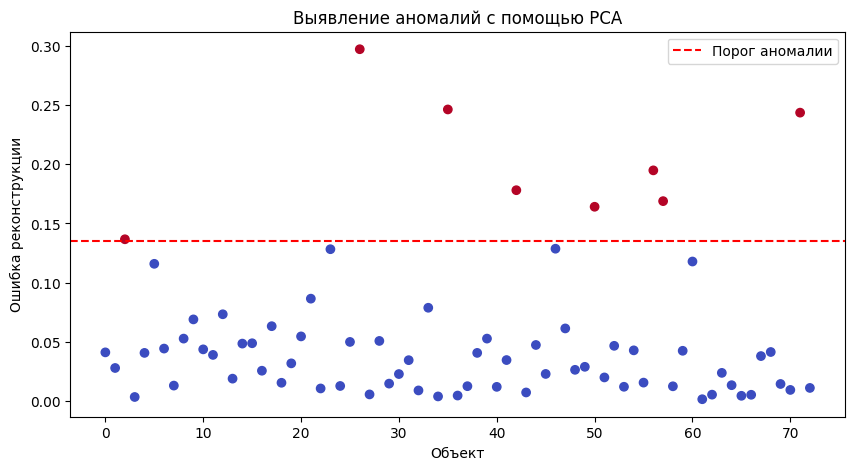

In [302]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_error)), reconstruction_error, c=(reconstruction_error > threshold), cmap="coolwarm")
plt.axhline(threshold, color='r', linestyle='dashed', label="Порог аномалии")
plt.xlabel("Объект")
plt.ylabel("Ошибка реконструкции")
plt.title("Выявление аномалий с помощью PCA")
plt.legend()
plt.show()

In [303]:
anomalies = np.where(reconstruction_error > threshold)[0]
df_anom = df_cut.loc[anomalies]
df_anom

,sex,age,hemoglobin,erythrocytes,mean_erythrocyte_volume,mean_hb_content,mean_hb_concentration,erythrocyte_heterogeneity,hematocrit,platelets,mean_platelet_volume,platelet_heterogeneity,thrombocrit,leukocytes
2,0,45.0,120.0,4.16,88.199997,28.900000,327.0,13.000000,36.700001,283.0,8.7,16.700001,0.25,3.73
26,0,20.0,113.0,4.20,81.199997,26.799999,331.0,16.700001,34.099998,310.0,11.0,16.299999,0.34,5.45
35,1,22.0,149.0,5.07,87.599998,29.299999,336.0,12.500000,44.400002,245.0,10.5,16.200001,0.26,6.16
42,0,25.0,136.0,4.52,90.599998,30.100000,332.0,13.100000,40.900002,298.0,10.3,17.400000,0.31,5.05
50,0,34.0,126.0,4.41,85.500000,28.500000,333.0,14.400000,37.700001,272.0,9.7,17.100000,0.26,6.92
56,0,20.0,135.0,4.32,92.900002,31.100000,337.0,12.300000,40.099998,482.0,9.6,16.100000,0.46,5.95
57,1,27.0,146.0,5.07,85.199997,28.900000,338.0,11.800000,43.200001,232.0,9.1,15.900000,0.21,6.20
71,0,28.0,121.0,4.06,91.500000,29.900000,326.0,13.700000,37.099998,349.0,10.3,16.500000,0.36,7.01
